In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import os

chdir=(r"C:\Users\NooR\Downloads\machine learning\reguarization\features selection")


In [30]:
bostn=pd.read_csv("HousingData.csv")
bostn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [31]:
bostn.isna()
bostn['ZN'].isnull().values.any()
bostn['PTRATIO'].isnull().sum()
bostn.isnull().values.any()
bostn.isnull().tail()
bostn.notnull().tail()
bostn.isnull().sum()



CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [32]:
bostn.shape

(506, 14)

In [33]:


fill_nan = bostn['CRIM'].fillna(value=0,inplace = True)
fill_nan = bostn['ZN'].fillna(value=0 ,inplace = True)
fill_nan = bostn['INDUS'].fillna(value= 0,inplace = True)
fill_nan = bostn['CHAS'].fillna(value= 0,inplace = True)
fill_nan = bostn['AGE'].fillna(value= 0,inplace = True)
fill_nan = bostn['LSTAT'].fillna(value= 0 ,inplace = True)

In [34]:
x=bostn.drop('MEDV', axis=1).values
y=bostn['MEDV'].values



In [35]:
names=bostn.columns.drop('MEDV')
print(names)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [36]:
len(names)

13

In [37]:
lasso=Lasso(alpha=.1)
lasso.fit(x,y)

Lasso(alpha=0.1)

In [38]:
coef=lasso.coef_
coef

array([-0.10827023,  0.0484652 , -0.05798282,  1.41597717, -0.        ,
        4.26006424, -0.02141141, -1.10335645,  0.24850677, -0.01418573,
       -0.79946215,  0.01034894, -0.43173415])

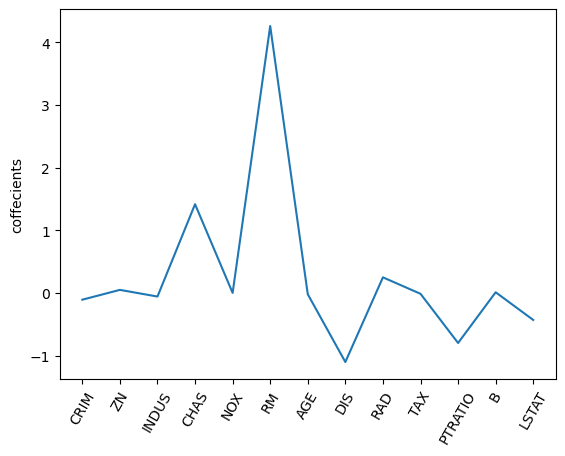

In [39]:
plt.plot(range(len(names)),coef)
plt.xticks(range(len(names)),names,rotation = 60) 
plt.ylabel('coffecients')
plt.show()

In [40]:
import seaborn as sns
sns.pairplot(bostn)

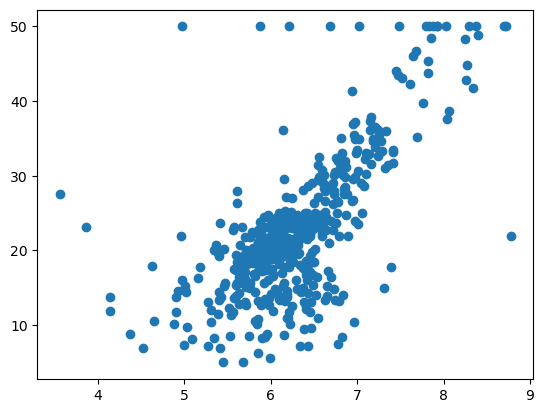

In [ ]:
plt.scatter(bostn["RM"],bostn["MEDV"])
